# Exploratory Data Analysis: Saudi Arabia Real Estate Market

#### Analyised By: Shaikha Alawadhi - Maitham Mansoor - Hussain Zainal

# Introduction

Exploratory Data Analysis on SA_Aqar.csv
This dataset contains real estate listings from Saudi Arabia. We'll explore pricing trends, property sizes, and regional differences.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [3]:
df = pd.read_csv('SA_Aqar.csv')
df.head()


,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,1,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,...,1,0,1,0,0,1,0,0,60000,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,0,1,0,0,0,0,0,55000,فيلا للايجار جديده لن تستخدم ش...
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,1,0,1,0,1,1,0,0,70000,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...


In [4]:
df.info()
df.describe()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3718 entries, 0 to 3717
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          3718 non-null   object
 1   district      3718 non-null   object
 2   front         3718 non-null   object
 3   size          3718 non-null   int64 
 4   property_age  3718 non-null   int64 
 5   bedrooms      3718 non-null   int64 
 6   bathrooms     3718 non-null   int64 
 7   livingrooms   3718 non-null   int64 
 8   kitchen       3718 non-null   int64 
 9   garage        3718 non-null   int64 
 10  driver_room   3718 non-null   int64 
 11  maid_room     3718 non-null   int64 
 12  furnished     3718 non-null   int64 
 13  ac            3718 non-null   int64 
 14  roof          3718 non-null   int64 
 15  pool          3718 non-null   int64 
 16  frontyard     3718 non-null   int64 
 17  basement      3718 non-null   int64 
 18  duplex        3718 non-null   int64 
 19  stairs

Index(['city', 'district', 'front', 'size', 'property_age', 'bedrooms',
       'bathrooms', 'livingrooms', 'kitchen', 'garage', 'driver_room',
       'maid_room', 'furnished', 'ac', 'roof', 'pool', 'frontyard', 'basement',
       'duplex', 'stairs', 'elevator', 'fireplace', 'price', 'details'],
      dtype='object')

In [6]:

df.drop_duplicates(inplace=True)


df.isnull().sum()
df.fillna({'price': df['price'].median()}, inplace=True)

df['price'] = pd.to_numeric(df['price'], errors='coerce')


In [7]:

df['price_per_m2'] = df['price'] / df['size']


### Questions

What are the average prices by city?

Which districts have the largest properties?

Is there a correlation between size and price?


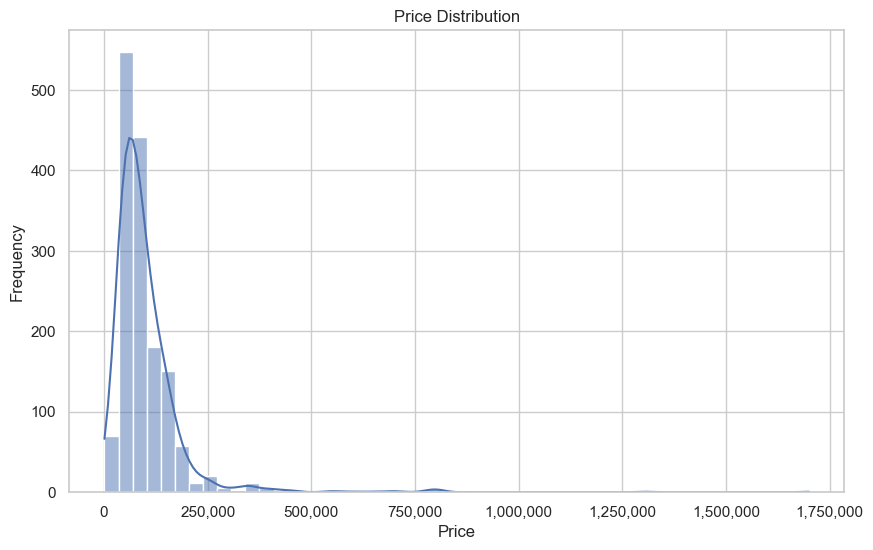

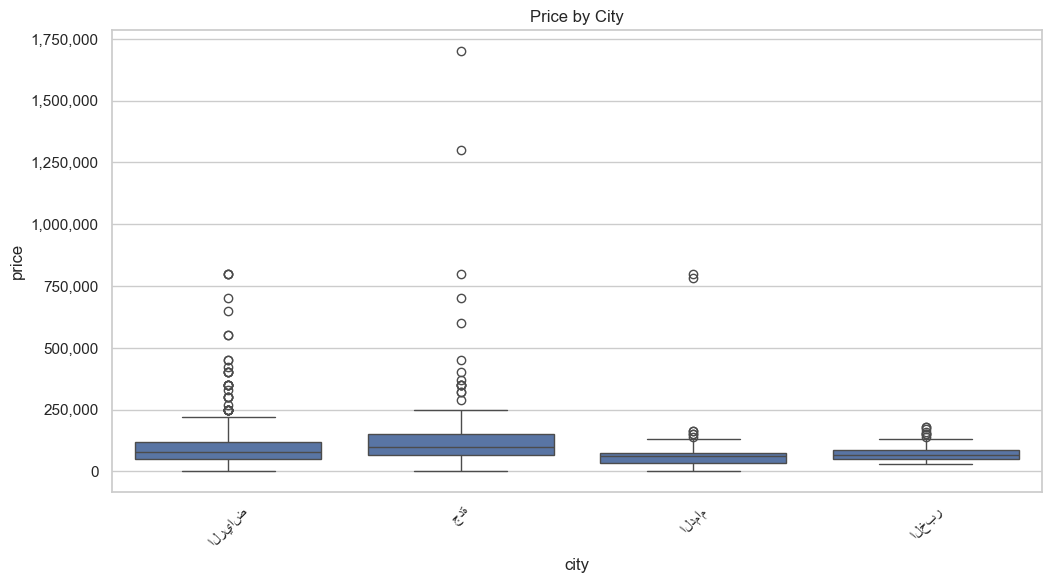

In [18]:

import seaborn as sns
import matplotlib.ticker as ticker

# Price distribution
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Format x-axis to show full numbers
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

# Price by city
plt.figure(figsize=(12,6))
sns.boxplot(x='city', y='price', data=df)
plt.xticks(rotation=45)
plt.title('Price by City')

# Format y-axis to show full numbers
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y):,}'))

plt.show()






In [19]:
df.groupby('city')['price'].agg(['mean', 'median', 'max']).sort_values(by='mean', ascending=False)


,mean,median,max
city,,,
جدة,122114.610706,100000.0,1700000
الرياض,95082.890487,80000.0,800000
الخبر,75613.855422,65000.0,180000
الدمام,72556.910569,60000.0,800000


# Key Findings:
- Riyadh and Jeddah have the highest average property prices.
- There is a moderate correlation between size and price.
- Some districts consistently show higher price per square meter.

# Recommendations:
- Focus marketing efforts on high-value districts.
- Consider further segmentation by property type.